<a href="https://colab.research.google.com/github/AJ-Horch/customer_lifetime_value_prediction/blob/main/cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I’m a junior analyst working for an e-commerce startup. It’s Jan 2020, and the firm has just been through its first winter sale. Senior stakeholders are interested in knowing which products performed best during the Christmas period so they can streamline the products they advertise in future sales periods.  We will do this by analysing up to two months of events data presented as two separate data sources with identical structures. Events refer no just to sales but to more general customer actions, such as viewing a product on the website or placing it into their vertical cart. The problem is no one knows what best means.
But they have ideas:
Volume of sales
Total revenue from a single product
Popularity measured by the number of unique customers who bought a product
Conversion, meaning the percentage of time a product is bought once it have been placed in the virtual shopping cart
Products with increased performance from Nov - Dec.
The relative importance of these factors is unclear, but one or more of these metrics are hwat they would like you to consider. They’re open to additional suggestions for metrics that would help improve the performance of future sales.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mount to drive and import files from there

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
december = pd.read_csv("/content/drive/MyDrive/year 29/Data Science /notebooks/solve_any_data_analysis_problem/project_3/december.csv.gz")
november = pd.read_csv("/content/drive/MyDrive/year 29/Data Science /notebooks/solve_any_data_analysis_problem/project_3/november.csv.gz")



## Exploring the data

In [ ]:
december.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
1,2019-12-01 00:00:12 UTC,cart,1004833,2232732093077520756,construction.tools.light,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
2,2019-12-01 00:00:28 UTC,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5
3,2019-12-01 00:00:30 UTC,cart,1005003,2232732093077520756,construction.tools.light,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9
4,2019-12-01 00:00:39 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [ ]:
november.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a
1,2019-11-01 00:00:41 UTC,purchase,13200605,2053013557192163841,furniture.bedroom.bed,NaN,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
2,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
3,2019-11-01 00:03:24 UTC,cart,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
4,2019-11-01 00:03:39 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e


In [ ]:
# concat the data
events= pd.concat([december,november], axis=0, ignore_index=True)
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
1,2019-12-01 00:00:12 UTC,cart,1004833,2232732093077520756,construction.tools.light,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
2,2019-12-01 00:00:28 UTC,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5
3,2019-12-01 00:00:30 UTC,cart,1005003,2232732093077520756,construction.tools.light,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9
4,2019-12-01 00:00:39 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


### initial thoughts
- I can split the category_code to get detailed categoryies. For instance I could split along the '.' and get 'light', or 'appliances'
- What does the distribution of price look like by month, and overall?
- Is there a way to assign category_id. It looks like 2232732093077520756 is for all construction tools.

In [ ]:
print(events.shape)
events.info()

(7033125, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7033125 entries, 0 to 7033124
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 482.9+ MB


### missing values

In [ ]:
events.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,395108
price,0
user_id,0
user_session,27


Lots of missing brands, and a few missing user_sessions. I think I might end up dropping some of the user_sessions.

What sort of brands would be missing? What products are associated with missing brands. Keeping this mind I'll return to this problem later.

### Validate the data

In [ ]:
events["event_time"] = pd.to_datetime(events["event_time"],
                                      format='%Y-%m-%d %H:%M:%S %Z')
events["event_time"].agg(['min', 'max'])

,event_time
min,2019-11-01 00:00:14+00:00
max,2019-12-31 23:59:09+00:00


In [ ]:
# Calculate the number of days in each month
(
    events
    .assign(month=events["event_time"].dt.month,
            day=events["event_time"].dt.day)
    .groupby("month")
    ['day']
    .nunique()
)

,day
month,
11,30
12,31


### Distribution of the events per day
The result above confirms that we have at least on evernt per day. Now I want to see what the distirbution of events looks like over the period of time.

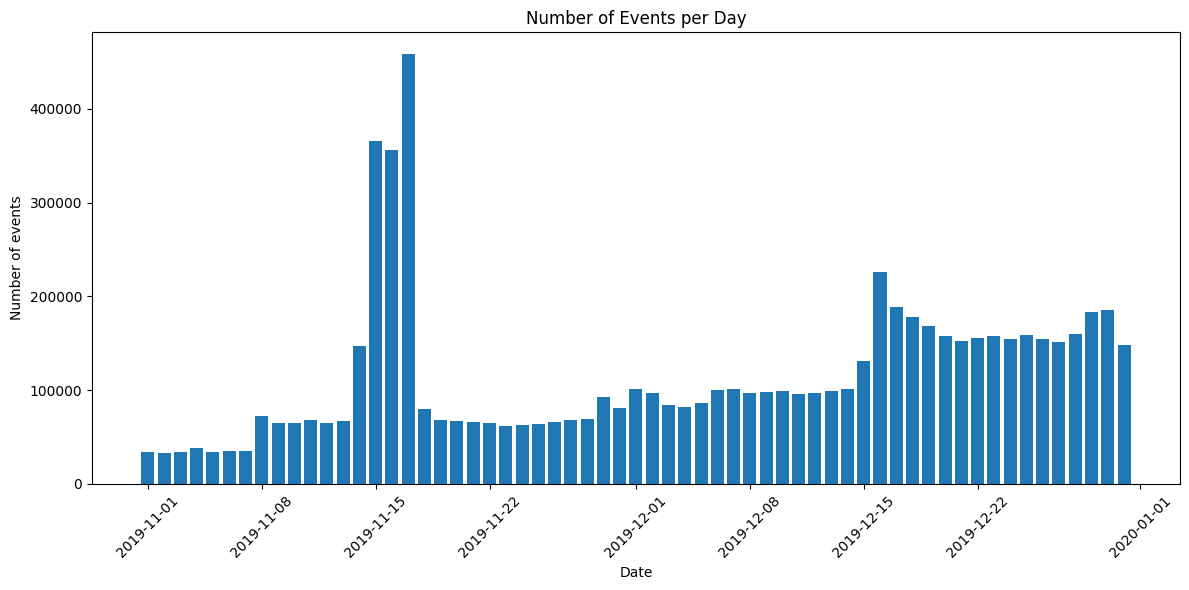

In [ ]:
# calculate the events per day
events_per_day = (
    events
    .assign(date=events["event_time"].dt.date)
    .groupby("date")
    .size()
    .reset_index(name="count")
)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(events_per_day['date'], events_per_day['count'])
plt.title('Number of Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

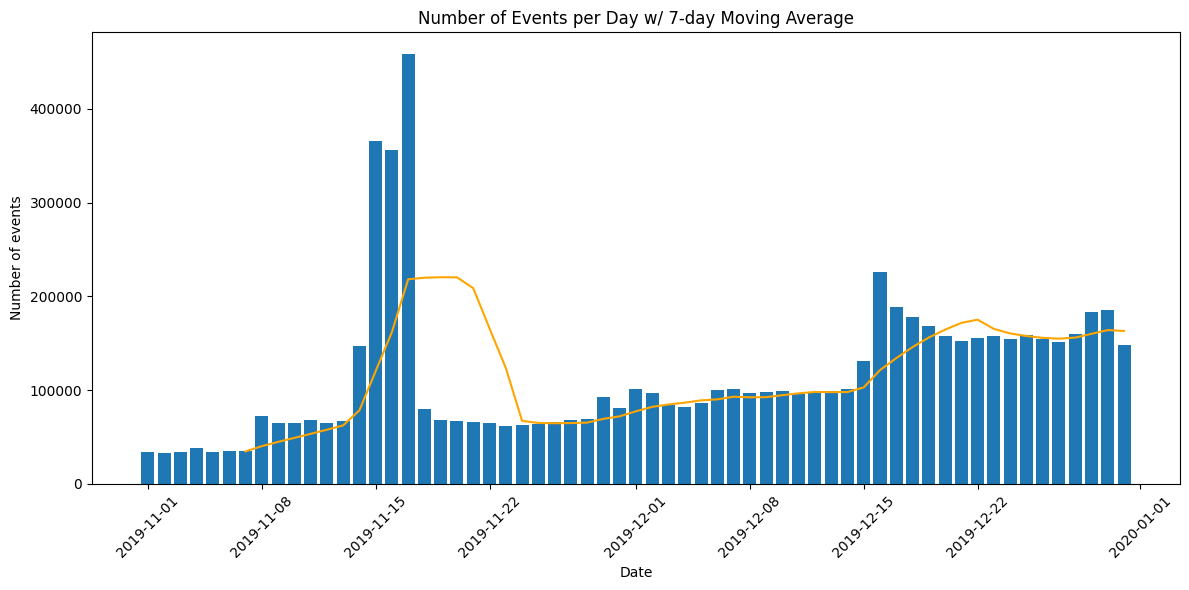

In [ ]:
# calculate the events per day
events_per_day = (
    events
    .assign(date=events["event_time"].dt.date)
    .groupby("date")
    .size()
    .reset_index(name="count")
)

# add a trend line
events_per_day['moving_avg'] = events_per_day['count'].rolling(window=7).mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.plot(events_per_day['date'], events_per_day['moving_avg'], label='7-day Moving Average', color='orange')
plt.bar(events_per_day['date'], events_per_day['count'])
plt.title('Number of Events per Day w/ 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There's a surge in mid Nov, but I don't know why. Activity picks up again in mid Dec and maintains until the end of they year.

Next I want to know how the activty breaks out, purchases vs carts

In [ ]:
events['event_type'].value_counts(dropna=False)

,count
event_type,
cart,5276372
purchase,1756753


In [ ]:
cart = len(events[events['event_type'] == 'cart'])
purchase = len(events[events['event_type'] == 'purchase'])
total = cart + purchase
print(f"cart makes up : {cart / total} percent of total activity")

cart makes up : 0.7502172931662667 percent of total activity


In [ ]:
# what are the top brands?
events['brand'].value_counts().head(10)

,count
brand,
samsung,1756284
apple,1368364
xiaomi,722125
huawei,263155
oppo,128661
lg,123581
sony,78615
artel,72124
lucente,69998


Lots of tech/electronic brands

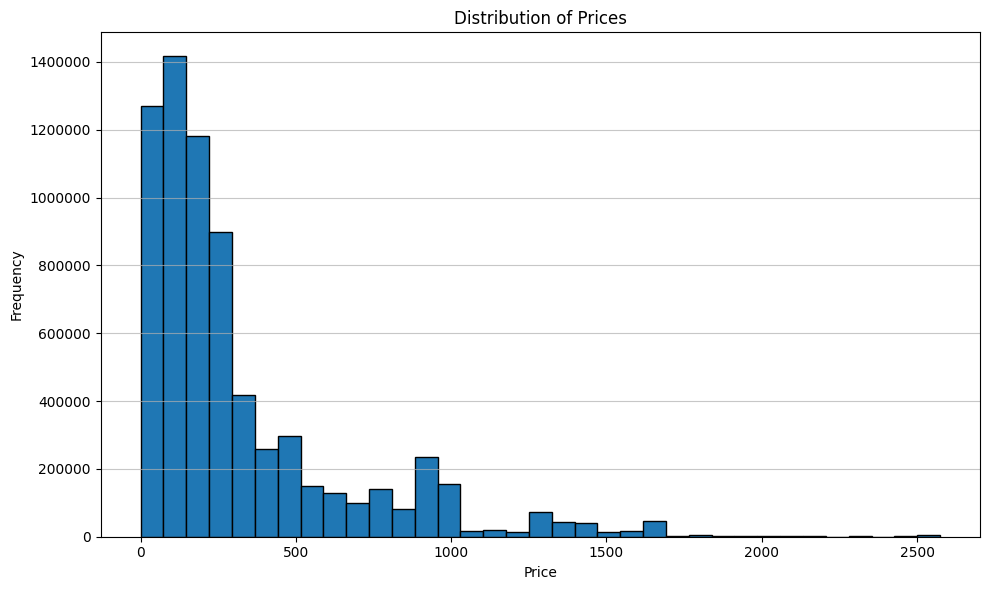

In [ ]:
# what is the dist of the prices
plt.figure(figsize=(10, 6))
plt.hist(events['price'], bins=35, edgecolor='black')

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.ticklabel_format(useOffset=False, style='plain')
plt.tight_layout()
plt.show()

### So far
So far here's is what I know:
- there was a surge of activity in mid-Nov, followed by a cooling off period. There was another surge in mid-Dec with sustained activity until the end of the year.
- The brands with the most activity are tech/electronic brands
- The Distribution of prices suggests cheaper goods are the most popular. How do the distributions of price differ from 'purschased' and 'cart'?
- 75% of activity is cart, 25% is an actual purchase.

I want to know what products performed the 'best'. Let's start by seperating these into which products were purchased and ones that just hung out in the cart.

The converison number = If I want to know how long a product spent in a cart I have to find the user_sessions?

In [ ]:
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
1,2019-12-01 00:00:12+00:00,cart,1004833,2232732093077520756,construction.tools.light,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
2,2019-12-01 00:00:28+00:00,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5
3,2019-12-01 00:00:30+00:00,cart,1005003,2232732093077520756,construction.tools.light,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9
4,2019-12-01 00:00:39+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [ ]:
# are there dupilcate user sessions?
print(f"The number of user sessions = {events['user_session'].nunique()} ")
print(f"The number of users = {events['user_id'].nunique()}")
print(f"The number of product_ids = {events['product_id'].nunique()}")
print(f"The number of category_codes = {events['category_code'].nunique()}")
print(f"The number of category_ids = {events['category_id'].nunique()}")
print(f"The number of brands = {events['brand'].nunique()}")

The number of user sessions = 3169946 
The number of users = 1333980
The number of product_ids = 83838
The number of category_codes = 134
The number of category_ids = 862
The number of brands = 3343


There's something off. There are 83,838 product ids but only 124 category_codes and 862 category_ids respectively. Tied to 3343 brands I suspect there is something wrong with the way things are be categorized.

### Investigating categoization of products

In [ ]:
(
    events.groupby('product_id')
    ['category_code']
    .nunique()
    .loc[lambda x: x > 1]
    .sort_values(ascending=False)
)

,category_code
product_id,
1000978,2
13900087,2
13900049,2
13900054,2
13900055,2
...,...
5701183,2
5701186,2
5701190,2


There are 12,884 misassigned products.

In [ ]:
events['category_code'].value_counts().head(15)

,count
category_code,
construction.tools.light,1823398
electronics.smartphone,1577185
electronics.audio.headphone,240308
electronics.clocks,233198
sport.bicycle,231644
apparel.shoes,212586
appliances.kitchen.refrigerators,190523
appliances.personal.massager,185601
appliances.environment.vacuum,170290


In [ ]:
events.loc[events['category_code'] == 'construction.tools.light', 'brand'].value_counts().head(10)

,count
brand,
samsung,727599
apple,521481
xiaomi,304546
huawei,149347
oppo,68446
vivo,10709
meizu,9093
honor,4389
nokia,3231


Things are beginning to make sense. From the head i can see two construction.lights. Since when does Samsung or Apple make construction tools? I need to find out which product_ids have been assigned multiple categories

In [ ]:
dupe_product_ids = (
    events
    .groupby('product_id')
    ['category_code']
    .nunique()
    # filter for results that keep only the product IDs where the number of unique
    # cateogry codes is greater than 1
    .loc[lambda x: x > 1]
    .index
    .values
)

dupe_product_ids[:15]

array([1000978, 1001588, 1001618, 1001619, 1002098, 1002100, 1002101,
       1002225, 1002367, 1002482, 1002484, 1002524, 1002525, 1002527,
       1002528])

In [ ]:
# create dupe id list
dupe_ids = dupe_product_ids[:10]

# Now I can find instances of where products are assigned the same category_code
dupes = (
    events.loc[events["product_id"].isin(dupe_ids), "category_code"]
    .value_counts()
    .to_frame()
    .join(events.loc[events["product_id"].isin(dupe_ids), "category_code"]
          .value_counts(normalize=True)
          .to_frame(name='percentage'))
)

print(dupes)


                                  count  percentage
category_code                                      
construction.tools.light           1521    0.540320
electronics.smartphone             1220    0.433393
appliances.kitchen.refrigerators     74    0.026288


### fixing the problem
The plan of action is to find products with multiplt categories, and for cases where one category is 'light constrcution tools' we use the other category an in instances where we have different duplicate categoreis we use the majority one. Example, if a product_id is more frequently classed as a fridgr than light it will become a fridge in the new category. There are drawbacks but we can only use the data we have.

In [ ]:
def get_correct_cateogry_code(product_id_rows):
  # product_id_rows is all rows for a given product ID
  # so I can find two categories assocaited with this ID
  categories = product_id_rows['category_code'].value_counts()

  #if one us construction.tool.light, retutn the other one
  if 'construction.tools.light' in categories.index:
    return categories.index.drop('construction.tools.light').values[0]
  # otherwise return the majority category
  else:
    return categories.index[0]

corrected_categories = (
    events[events['product_id'].isin(dupe_product_ids)]
    .groupby('product_id')
    .apply(get_correct_cateogry_code)
    .reset_index(name='corrected_category')
)

corrected_categories.head()

<ipython-input-24-e98b5cfe2469>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_correct_cateogry_code)


,product_id,corrected_category
0,1000978,electronics.smartphone
1,1001588,electronics.smartphone
2,1001618,electronics.smartphone
3,1001619,electronics.smartphone
4,1002098,electronics.smartphone


In [ ]:
events.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
1,2019-12-01 00:00:12+00:00,cart,1004833,2232732093077520756,construction.tools.light,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
2,2019-12-01 00:00:28+00:00,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5
3,2019-12-01 00:00:30+00:00,cart,1005003,2232732093077520756,construction.tools.light,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9
4,2019-12-01 00:00:39+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [ ]:
events=events.merge(corrected_categories, on='product_id', how='left')
events.loc[events['corrected_category'].notnull(), 'category_code'] = \
events.loc[events['corrected_category'].notnull(), 'corrected_category']

events['category_code'].value_counts()

,count
category_code,
electronics.smartphone,3350632
sport.bicycle,384688
appliances.personal.massager,255170
electronics.clocks,228580
appliances.kitchen.refrigerators,214867
...,...
apparel.skirt,255
construction.tools.soldering,198
sport.diving,158


In [ ]:
events["category"] = events["category_code"].str.split(".").str[0]

events = events.rename(columns={"category_code": "subcategory"})

events["category"].value_counts()

,count
category,
electronics,3908248
appliances,1251229
apparel,542153
sport,439649
computers,290236
furniture,216434
construction,144319
kids,98080
auto,88611


### Chekcing for brand assignment
Products are caregorized with their brand. I'll investigate whether there are any products IDs that have multiple brands against them.

In [ ]:
duplicated_brands = (
    events
    .assign(brand = events['brand'].fillna('No brand'))
    .groupby('product_id')
    ['brand']
    .nunique()
    .loc[lambda x: x > 1]
    .index
)

print(f'There are {len(duplicated_brands)} duplicated brands')

duplicated_brands[:10]

There are 1245 duplicated brands


Index([1001618, 1002310, 1002786, 1002877, 1003080, 1003224, 1003238, 1003330,
       1003604, 1003851],
      dtype='int64', name='product_id')

There are 1,254 products in the catalog that have either two different brands against them or have the brand column missing. To clean this up, I'll apply the same logic as I did with categories for products with multiple brands against hem pick the majority non-null brand.

In [ ]:
def get_correct_brand(product_id_rows):
  # product_id_rows is all rows for a given product ID
  # so we can find the brands associated with this ID
  # value_counts will five us only non-NA values
  brand_counts = product_id_rows["brand"].value_counts(dropna=False)

  if isinstance(brand_counts.index[0], str):
    # no Nulls, just return the majority brand
    return brand_counts.index[0]
  # now if np.NaN is the only value, return it
  if len(brand_counts) == 1:
    return np.nan

  #otherwise return the second value (the majority non-bull value)
  return brand_counts.index[1]

corrected_brands = (
    events[events["product_id"].isin(duplicated_brands)]
    .groupby("product_id")
    .apply(get_correct_brand)
    .reset_index(name='corrected_brand')
)

corrected_brands.head()

<ipython-input-29-3c4a35591919>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_correct_brand)


,product_id,corrected_brand
0,1001618,apple
1,1002310,lg
2,1002786,apple
3,1002877,samsung
4,1003080,huawei


Join these corrected brnads to the orginal events data and overwrite the brand column where necessary. Verify whether thse are any produts IDs that still have multiple combinations of brand and category

In [ ]:
events = events.merge(corrected_brands, on='product_id', how='left')
events.loc[events['corrected_brand'].notnull(), 'brand'] = \
  events.loc[events['corrected_brand'].notnull(), 'corrected_brand']

assert (
    len(events[['product_id', 'category', 'subcategory', 'brand']].drop_duplicates())
    ==
    events['product_id'].nunique()
)

In [ ]:
events.head()

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,corrected_category,category,corrected_brand
0,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db,NaN,computers,NaN
1,2019-12-01 00:00:12+00:00,cart,1004833,2232732093077520756,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,electronics.smartphone,electronics,NaN
2,2019-12-01 00:00:28+00:00,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5,NaN,computers,NaN
3,2019-12-01 00:00:30+00:00,cart,1005003,2232732093077520756,electronics.smartphone,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9,electronics.smartphone,electronics,NaN
4,2019-12-01 00:00:39+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,NaN,appliances,NaN


For the remainder of the project I'll be dealing with product-level data so a ufull step is to give each product a more descriptive nae. Eac product ID should have a unique name meaning he product ID should be a part of the name since it what makes the product unique.

In [ ]:
def get_product_name(row):
  brand = ""

  #only include brand if it's availabe
  if isinstance(row['brand'], str):
    brand = row['brand']

  return f"{str(row['product_id'])} - {brand} {row['subcategory']}"

events["product_name"] = events.apply(get_product_name, axis=1)

events.head()

,event_time,event_type,product_id,category_id,subcategory,brand,price,user_id,user_session,corrected_category,category,corrected_brand,product_name
0,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db,NaN,computers,NaN,26400248 - computers.peripherals.printer
1,2019-12-01 00:00:12+00:00,cart,1004833,2232732093077520756,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,electronics.smartphone,electronics,NaN,1004833 - samsung electronics.smartphone
2,2019-12-01 00:00:28+00:00,cart,17800342,2053013559868129947,computers.desktop,zeta,66.90,550465671,22650a62-2d9c-4151-9f41-2674ec6d32d5,NaN,computers,NaN,17800342 - zeta computers.desktop
3,2019-12-01 00:00:30+00:00,cart,1005003,2232732093077520756,electronics.smartphone,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9,electronics.smartphone,electronics,NaN,1005003 - huawei electronics.smartphone
4,2019-12-01 00:00:39+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,NaN,appliances,NaN,3701309 - polaris appliances.environment.vacuum


#### Seperating cleaned data from analysis
It is good practice to seperate data once its been cleaned from the analysis step. parquet is a useful format to know about because it is a compressed data format that stores type information, unlike other formats, such as CSVs. This means when we read in a parquet file in the future, we do not, for example, have to convert date columns to date types, as our code will already know about them.

In [ ]:
events.to_parquet("/content/drive/MyDrive/year 29/Data Science /notebooks/solve_any_data_analysis_problem/project_3/events.parquet.gz", compression='gzip')

### Summary of steps taken so far.

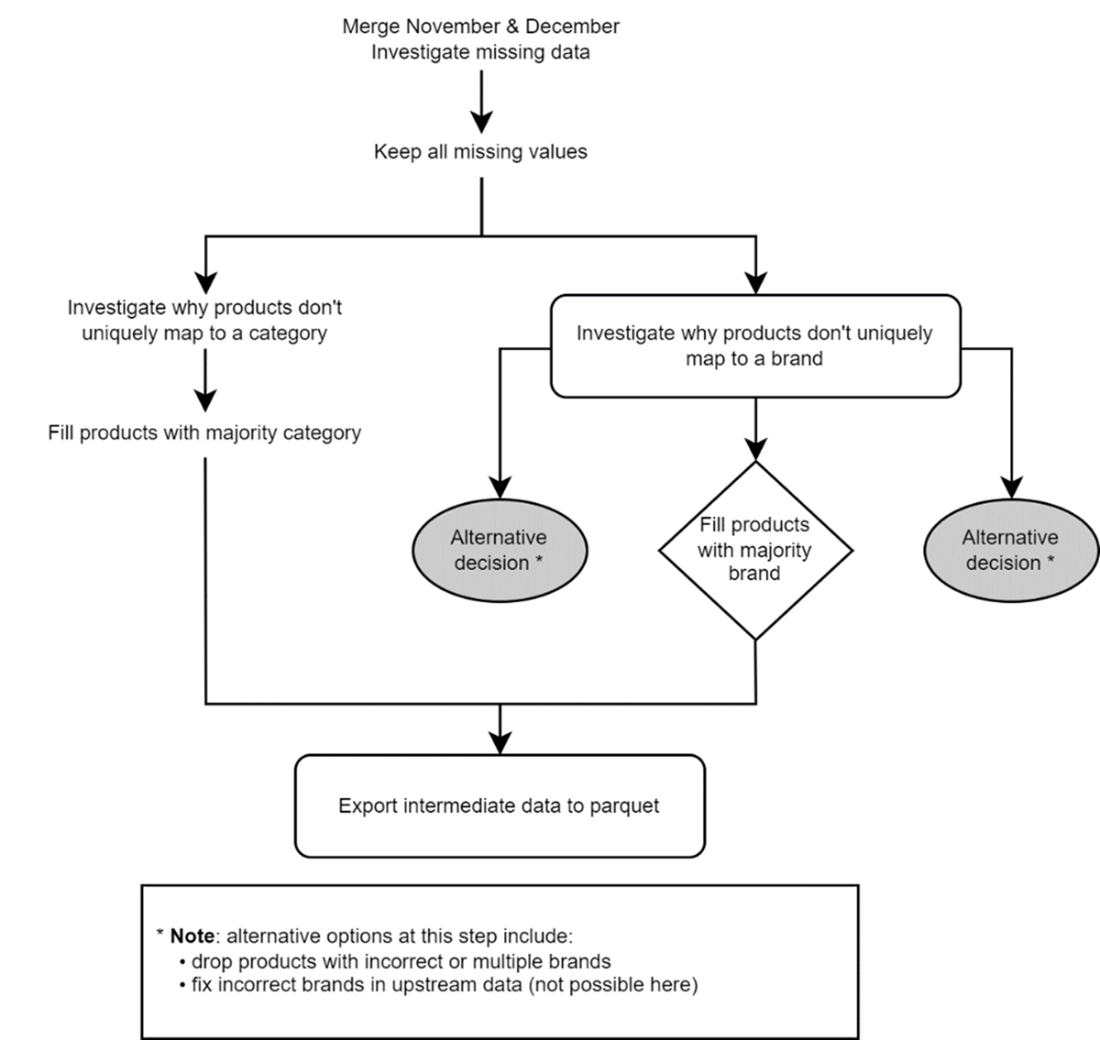